In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import jax.numpy as jnp
from scipy.io import wavfile as wf

In [2]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp1_sounds/

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp1_sounds


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
s1_file = "input/chopin-fantaisie-impromptu-op.wav"
s2_file = "input/scorch-fire.wav"

In [4]:
sampling_rate_1, s1 = wf.read(s1_file)
s1 = s1[:,0]

sampling_rate_2, s2 = wf.read(s2_file)
s2 = s2[:,0]
print(s1.shape, s2.shape)

(12390918,) (1554726,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_21364\1700381029.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_1, s1 = wf.read(s1_file)
C:\Users\TRETEC\AppData\Local\Temp\ipykernel_21364\1700381029.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_2, s2 = wf.read(s2_file)


In [5]:
S=[s1, s2]
S, X, Xw = mix_sources(S, normalise=False)
wf.write('./sound_mixture.wav', sampling_rate_2, X.mean(axis=0).astype(np.float32))

In [6]:
W,mcc = fast_ica(Xw, 1, 1e-8, 5000, true_sources=S) #Nour's method.

component 0
iteration : 0 : distance 0.517434298992157
----- MCC = 0.5221471842378378
iteration : 1 : distance 1.7881393432617188e-07
----- MCC = 0.5221471842378378
iteration : 2 : distance 0.0
----- MCC = 0.5221471842378378
component 1
iteration : 0 : distance 0.07519447803497314
----- MCC = 0.9999998807907104
iteration : 1 : distance 0.0
----- MCC = 0.9999997615814209


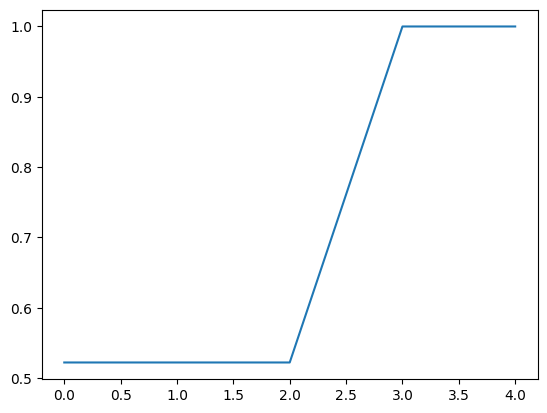

In [7]:
plt.plot(mcc)

In [8]:
unMixed = np.dot(W,Xw)


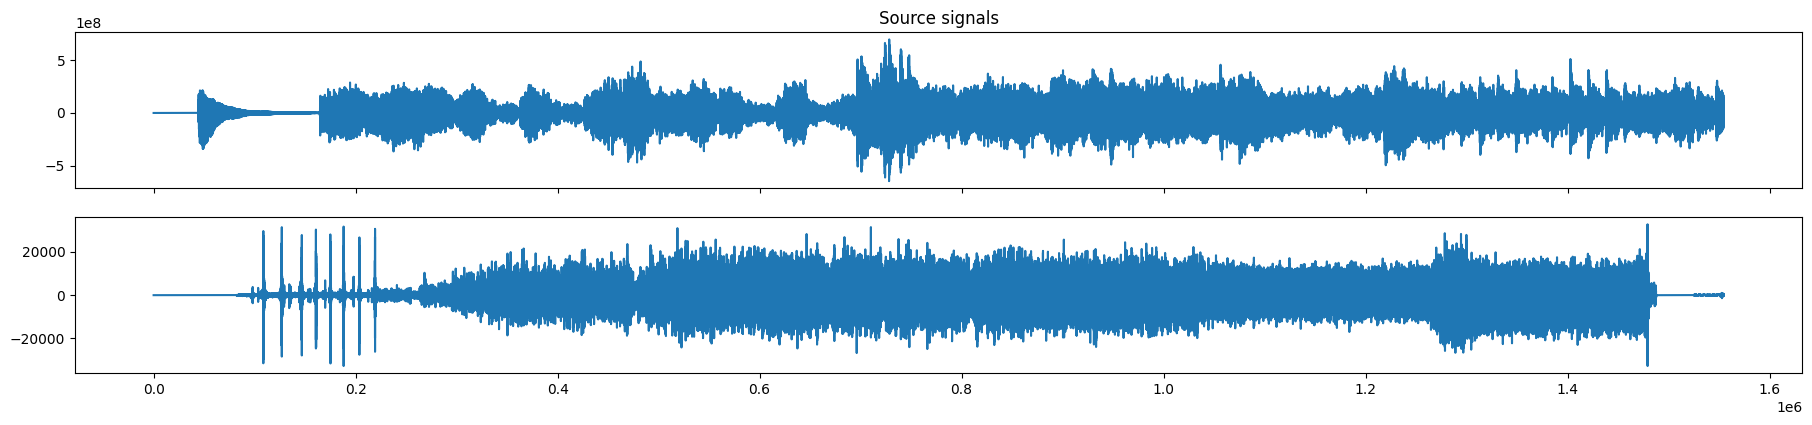

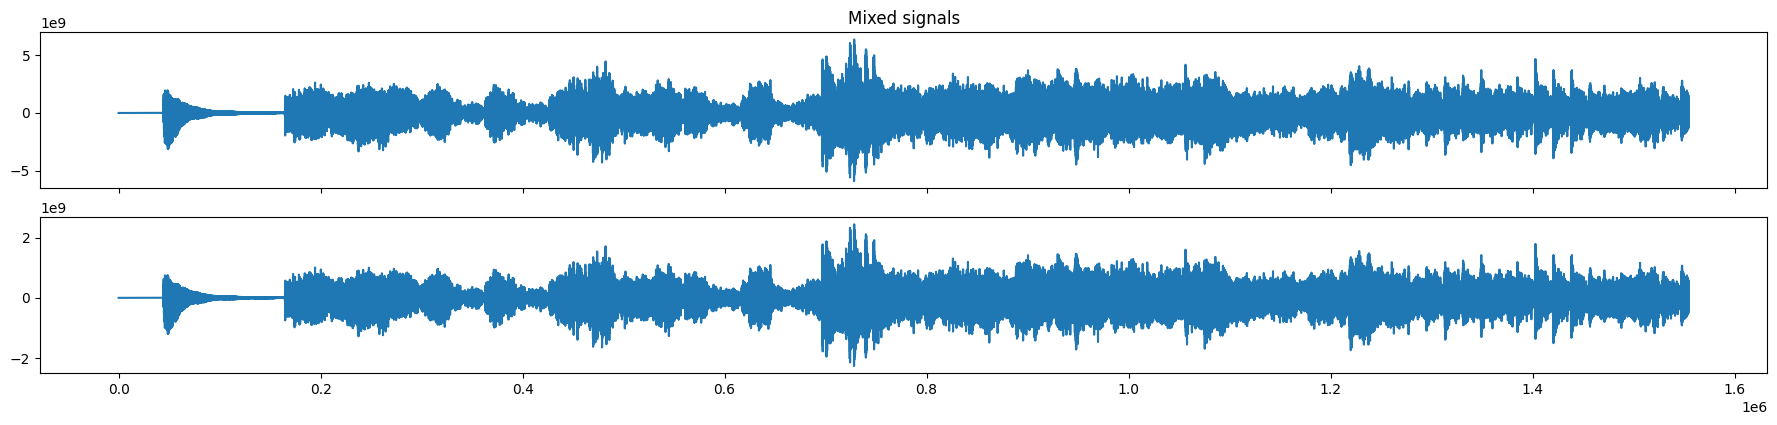

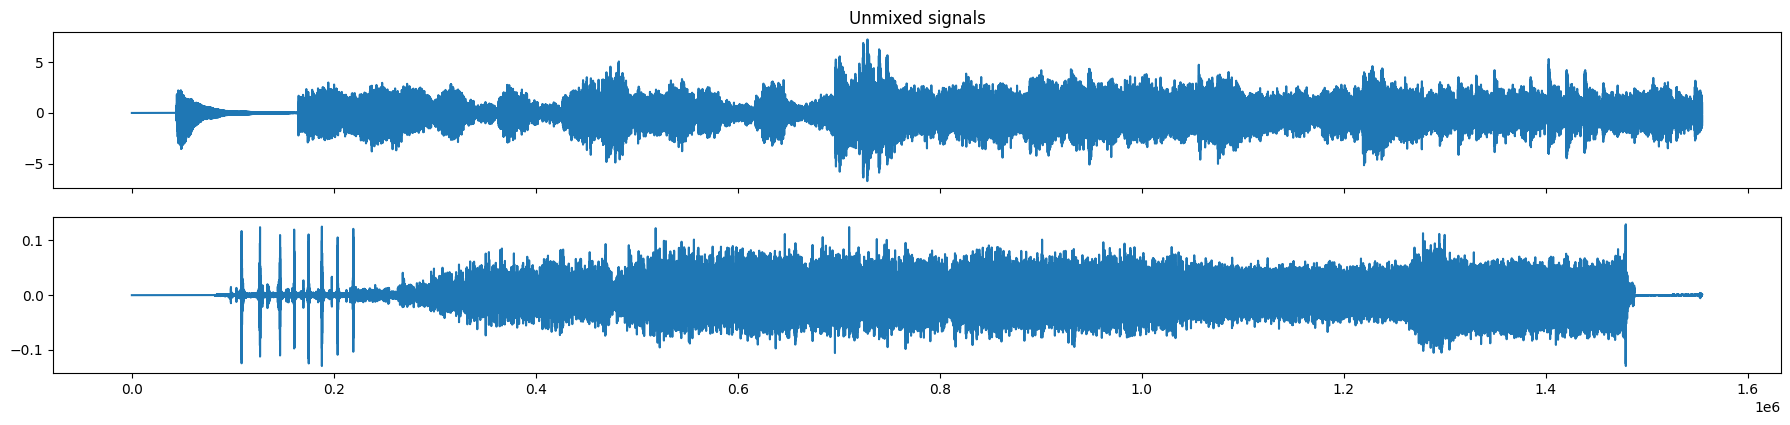

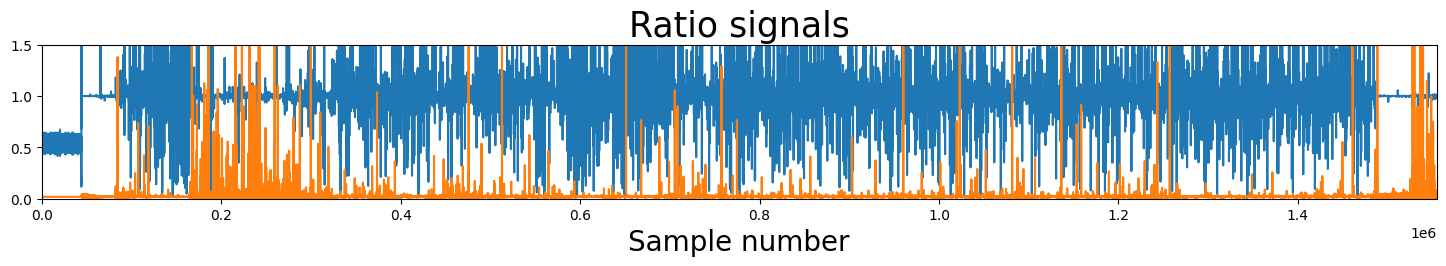

In [9]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)
perm = jnp.argmax(jnp.abs(unMixed @ S.T),
                    axis=0)

fig, ax = plt.subplots(1, 1, figsize=[18, 2])
for i in range(X.shape[0]):
    ax.plot(np.abs(unMixed[perm[i]] / Sw[i]), '-', label='Recovered signals')
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Ratio signals', fontsize=25)
ax.set_xlim(0, S.shape[1])
ax.set_ylim(0, 1.5)
plt.show()

In [10]:
wf.write('output/s1_predicted.wav', sampling_rate_2, unMixed[0].astype(np.float32))
wf.write('output/s2_predicted.wav', sampling_rate_2, unMixed[1].astype(np.float32))

In [11]:
from mva_independent_component_analysis.utils.metrics import fast_corr_coef
import jax.numpy as jnp
fast_corr_coef(unMixed,S)

0.9999997945208904